# Show traces for Voltage Tests

In [1]:
# adding the correct paths to PATH so imports work
import os

os.chdir(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

import numpy as np
import matplotlib.pyplot as plt
from brian2 import (
    ms,
    mV,
    defaultclock,
    NeuronGroup,
    SpikeMonitor,
    StateMonitor,
    SpikeGeneratorGroup,
    Synapses,
    run,
    prefs,
    set_device,
    device
)
# import lava device
from brian2lava.device import LavaDevice

# import the neuron model definitions from test
#from tests.test_voltage_trace import get_neuron_model_definitions, run_voltage_simulation
#NEURON_MODEL_DEFINITIONS = get_neuron_model_definitions()

from tests.test_voltage_trace import NEURON_MODEL_DEFINITIONS, run_voltage_simulation

# Run all models and plot their traces

MODEL: to_1
lava_workspace/neurongroup_to_1_process_model.py
200. ms
Run Lava simulation for 0.2 (201 steps)
comparison is
True


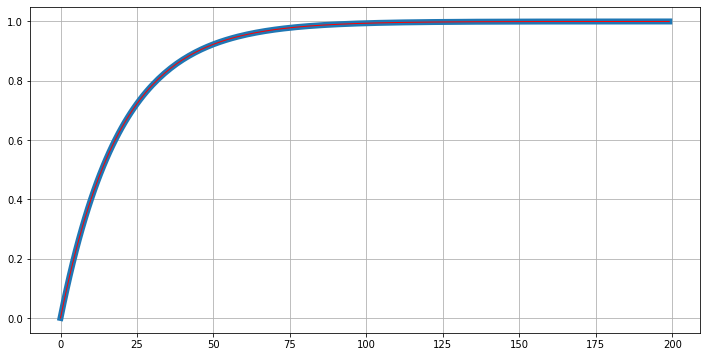

MODEL: white_noise_xi
lava_workspace/neurongroup_white_noise_xi_process_model.py
200. ms
Run Lava simulation for 0.2 (201 steps)
comparison is
True


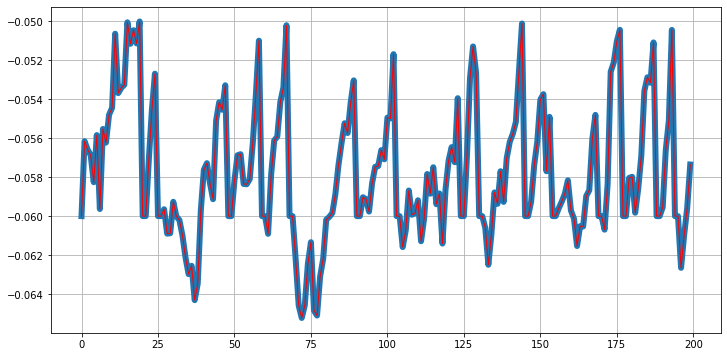

MODEL: CUBA
lava_workspace/neurongroup_CUBA_process_model.py
200. ms
Run Lava simulation for 0.2 (201 steps)
comparison is
True


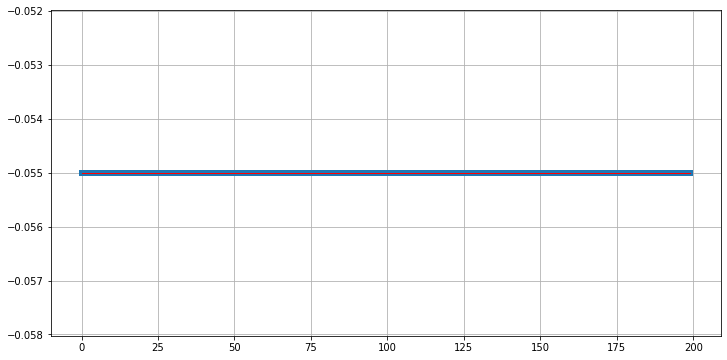

In [2]:
for model in NEURON_MODEL_DEFINITIONS:
    # print info
    print(f'MODEL: {list(model.keys())[0]}')

    # simulation
    trace_b2l = run_voltage_simulation(model, use_lava=True)
    trace_b = run_voltage_simulation(model, use_lava=False)
    trace_b = trace_b[0]  # for some reason brian will give a nested array
    # comparison
    print('comparison is')
    print(np.array_equal(trace_b2l, trace_b))

    # plot
    plt.figure(figsize=(12,6))
    plt.plot(trace_b2l, linewidth=6, color="tab:blue", label="Brian2Lava")
    plt.plot(trace_b, linewidth=1, color="red", label="Brian")
    plt.grid()
    plt.show()

# Test and run only a single model

{'CUBA': {'equation': '\n\t\t\tdv/dt  = (ge+gi-(v-El))/taum : volt (unless refractory)\n\t\t\tdge/dt = -ge/taue : volt\n\t\t\tdgi/dt = -gi/taui : volt\n\t\t\t', 'threshold_condition': 'v > Vt', 'reset_condition': 'v = Vr', 'refractory_time': 5. * msecond, 'method': 'euler', 'external_stimulation': False, 'synaptic_input_variable_ex': 'ge', 'synaptic_input_variable_in': 'gi', 'synaptic_weight_ex': 9. * mvolt, 'synaptic_weight_in': -7. * mvolt, 'stimulation_ex': {'indices': [0, 0], 'times': [1. * msecond, 50. * msecond]}, 'stimulation_in': {'indices': [0], 'times': [30. * msecond]}, 'neuron_variables': {'taum': 20. * msecond, 'taue': 5. * msecond, 'taui': 10. * msecond, 'Vt': -50. * mvolt, 'Vr': -60. * mvolt, 'El': -55. * mvolt}, 'initialize_variables': {'v': (-55, 'mV')}, 'simulation_runtime': 200. * msecond, 'state_variable_to_compare': 'v'}}
lava_workspace/neurongroup_CUBA_process_model.py
200. ms
Run Lava simulation for 0.2 (201 steps)
comparison is
True


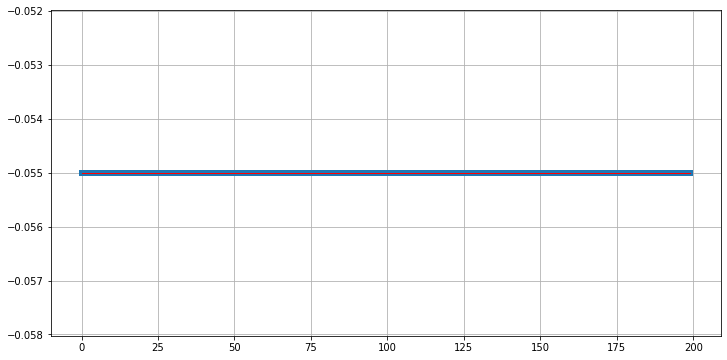

In [3]:
model_number = 2
model = NEURON_MODEL_DEFINITIONS[model_number]
print(model)

# simulation
trace_b2l = run_voltage_simulation(model, use_lava=True)
trace_b = run_voltage_simulation(model, use_lava=False)
trace_b = trace_b[0]  # for some reason brian will give a nested array
# comparison
print('comparison is')
print(np.array_equal(trace_b2l, trace_b))

# plot
plt.figure(figsize=(12,6))
plt.plot(trace_b2l, linewidth=6, color="tab:blue", label="Brian2Lava")
plt.plot(trace_b, linewidth=1, color="red", label="Brian")
plt.grid()
plt.show()